<a href="https://colab.research.google.com/github/safdarjung/projects/blob/main/Signature_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure, morphology
from skimage.color import label2rgb
from skimage.measure import regionprops
import numpy as np


In [ ]:
import os

os.makedirs("./outputs", exist_ok=True)

In [ ]:
img = cv2.imread('/content/in1.jpg',0)
img = cv2.threshold(img,150,255,cv2.THRESH_BINARY)[1]


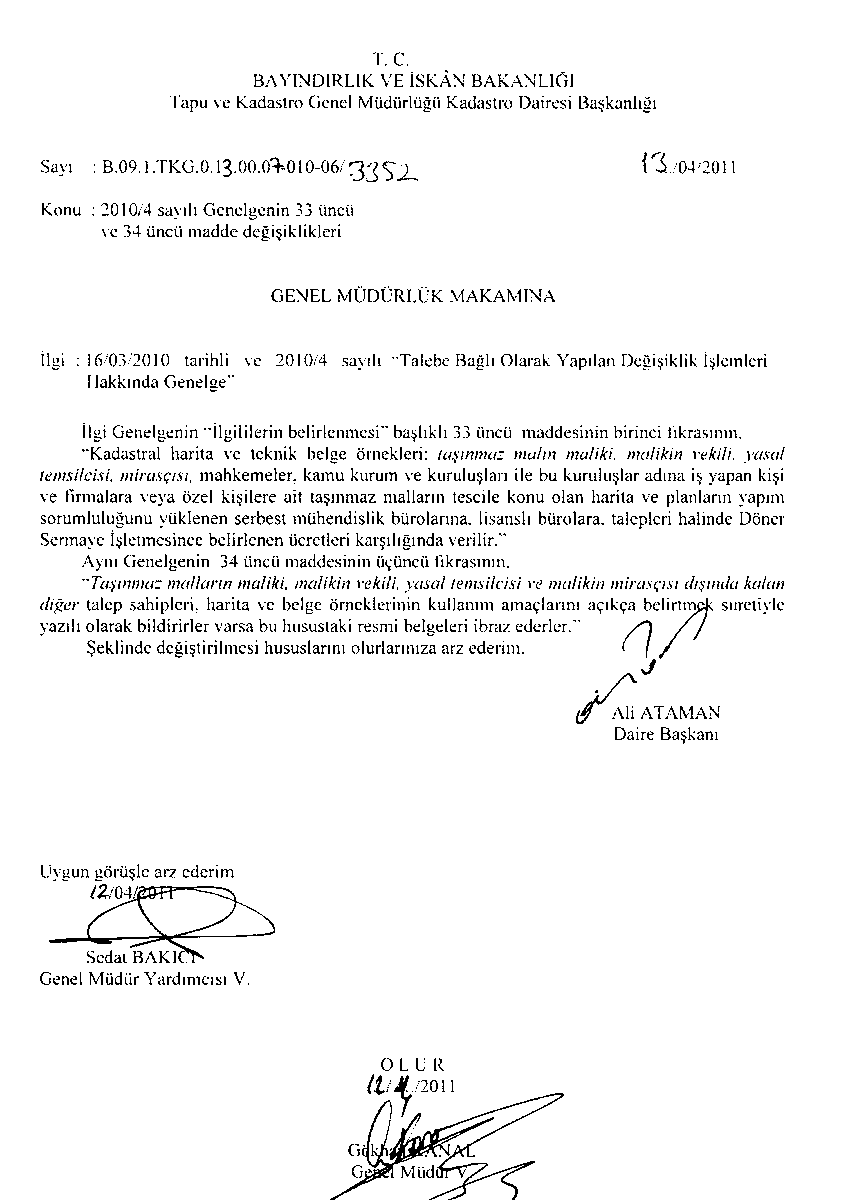

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)


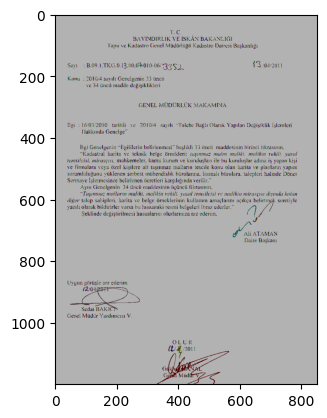

In [ ]:
blobs = img > img.mean()     # Pixels greater than the mean are set to True (foreground), others to False (background)
blobs_labels = measure.label(blobs,background=1)   # Background is set to label 1, meaning areas labeled as 1 are considered background
image_label_overlay = label2rgb(blobs_labels,image=img)    # Converts the labeled image to an RGB image for better visualization
plt.imshow(image_label_overlay)

In [ ]:
the_biggest_component = 0
total_area = 0
counter = 0
average = 0.0

In [ ]:

# selecting the values of the region where pixel value is more then 10
# and calculating the average of area where it is true

for region in regionprops(blobs_labels):
  if (region.area > 10):
    total_area = total_area + region.area
    counter = counter + 1
  if (region.area >= 250):
    if region.area >= the_biggest_component:
        the_biggest_component = region.area
average = total_area/counter
print('the_biggest_component: '+str(the_biggest_component))
print('average: '+str(average))

the_biggest_component: 2808.0
average: 27.549742078113486


In [ ]:
'''
to isolate the text regions by removing small noise components and
large elements like images or table headers.
 '''

const_para1 = 100
const_para2 = 300
const_para3 = 120
const_para4 = 20

a4_small_size_outliar_constant = ((average/const_para1)*const_para2)+const_para3
print("a4_small_size_outliar_constant: " + str(a4_small_size_outliar_constant))

a4_big_size_outliar_constant = a4_small_size_outliar_constant*const_para4
print("a4_big_size_outliar_constant: " + str(a4_big_size_outliar_constant))

pre_version = morphology.remove_small_objects(blobs_labels, a4_small_size_outliar_constant)


a4_small_size_outliar_constant: 202.64922623434046
a4_big_size_outliar_constant: 4052.984524686809


In [ ]:

component_sizes = np.bincount(pre_version.ravel())
too_small = component_sizes > (a4_big_size_outliar_constant)
too_small_mask = too_small[pre_version]
pre_version[too_small_mask] = 0
# save the the pre-version which is the image is labelled with colors
# as considering connected components
plt.imsave('pre_version.png', pre_version)

# read the pre-version
img = cv2.imread('pre_version.png', 0)

# save the the result
cv2.imwrite("./outputs/output.png", img)

True